# Errors plots

In [1]:
import sys
sys.path.append("..\\source\\")
import utils as utils
import glob

# Data and numbers
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
mpl.style.use('ggplot')
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# Palettes
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set2_8

In [2]:
# Pallete
cmap = Set2_8.mpl_colors # callable
cmap = [cmap[7],cmap[6],cmap[4],cmap[3],cmap[1],cmap[0]]

In [3]:
path_data = "..\\data\\processed\\summary\\"
path_meta = "..\\data\\original\\metadata\\"
path_res = "..\\results\\"
path_fig = "..\\figures\\"

In [4]:
ref = {0:"normal", 1:"A", 2:"B", 3:"C", 4:"D", 5:"E"}

# Functions

In [5]:
def get_sites(path_data, path_meta, meter):
    # Load original data
    df = pd.read_pickle(path_data + f"date_vs_bdg\\{meter}_RMSLE.pickle.gz")
    # Merge with metadata
    meta_bdg = pd.read_csv(path_meta + "building_metadata.csv")
    df = pd.merge(df, meta_bdg, how="left", on="building_id")
    # List of buildings and sites
    bdgs = list(df.building_id.unique())
    sites = list(df.site_id.unique())
    print(f"sites: {len(sites)}. Buildings: {len(bdgs)}")

    return sites

In [6]:
def error_df(path_error, site):

    errorD = pd.read_csv(path_res + f"{meter}_site_{site}_errorD.csv")
    df_error = errorD.copy()

    errorC = pd.read_csv(path_res + f"{meter}_site_{site}_errorC.csv")
    df_error.update(errorC)

    errorE = pd.read_csv(path_res + f"{meter}_site_{site}_errorE.csv")
    df_error.update(errorE)

    errorB = pd.read_csv(path_res + f"{meter}_site_{site}_errorB.csv")
    df_error.update(errorB)

    errorA = pd.read_csv(path_res + f"{meter}_site_{site}_errorA.csv")
    df_error.update(errorA)

    df_error = df_error.replace(["A","B","C","D","E"],[1,2,3,4,5]).fillna(0)
    df_error = df_error.apply(pd.to_numeric, errors='coerce')
    df_error.set_index("building_id",inplace=True)
    print(f"Site {site} error's dataframe created.")
    errors_type = df_error.melt().value.unique()
    
    return df_error, errors_type

In [7]:
def choose_palette(errors_type, ref):

    pal = []
    names = []

    for i in sorted(errors_type):
        # color list
        color = cmap[int(i)]
        pal.append(color)
        # name list
        name = ref[i]
        names.append(name)

    cmap1 = pal[1:]
    names1 = names[1:]

    return cmap1, names1

In [8]:
def plot_errors(df, error_types, ref):
    #Create figure canvas
    fig, axes = plt.subplots(1, 2, sharex = False, sharey=False, figsize=(16,8))
    axes = axes.flatten()

    # Color palettes
    errors_list = sorted(error_types)
    print(f"Error types found: {errors_list}")
    cmap0 = ListedColormap(cmap)
    cmap1, names1 = choose_palette(error_types,ref)
    
    ## HEATMAP

    # Get the data
    y = np.linspace(0, len(df), len(df)+1)
    x = pd.date_range(start='2017-01-01', end='2019-01-01')
    data0 = df
    # Plot
    #cmap0 = plt.get_cmap('Set2_r',6)
    ax0 = axes[0]
    qmesh0 = ax0.pcolormesh(x, y, data0, cmap=cmap0, rasterized=True, vmin=0, vmax=5)
    # Axis
    plt.locator_params(axis='y', nbins=len(list(data0.index))+1)
    ax0.axis('tight') 
    ax0.xaxis_date() # Set up as dates
    ax0.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y')) # set date's format
    ax0.set_yticklabels(list(data0.index)) # omit building ID on y axis
    # Color bar 
    #cbar0 = fig.colorbar(qmesh0, ax=ax0, orientation='vertical')
    #cbar0.ax.set_xticklabels(['Normal','Error type A','Error type B','Error type C','Error type D','Error type E'], rotation=00, ha='center',va="top")
    #cbar1.set_label('Type of error')

    ## COUNTPLOT
    # Melted df
    temp = df.reset_index().melt(id_vars="building_id")
    # Exclude normal readings
    normal = list(temp[temp.value == 0].index)
    temp = temp.drop(normal, axis=0)
    # Plot
    ax1 = axes[1]
    barplot = sns.countplot(data=temp,y="value",palette=cmap1, ax=ax1)
    # Axis
    ax1.set_yticklabels(names1)
    ax1.set(ylabel="", xlabel="")
    # Percentage at end of bars
    for p in barplot.patches:
        total=len(temp)
        width = p.get_width()
        height = p.get_height()
        barplot.text(width,
            p.get_y()+height/2,
            str(round((width/total)*100,1)) + "%",
            ha="center"
            )
    # Figure parameters
    fig.suptitle(f"{meter} - site {site}", y = 1.015, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)

    return fig

# Chilledwater meter

sites: 10. Buildings: 498
Site 0 not available.
Site 2 error's dataframe created.
Error types found: [0.0, 1.0]
Site 6 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 7 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 9 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 10 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 11 error's dataframe created.
Error types found: [0.0, 1.0, 3.0, 4.0, 5.0]
Site 13 error's dataframe created.
Error types found: [0.0, 2.0, 3.0, 4.0, 5.0]
Site 14 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 15 error's dataframe created.
Error types found: [0.0, 3.0, 4.0, 5.0]


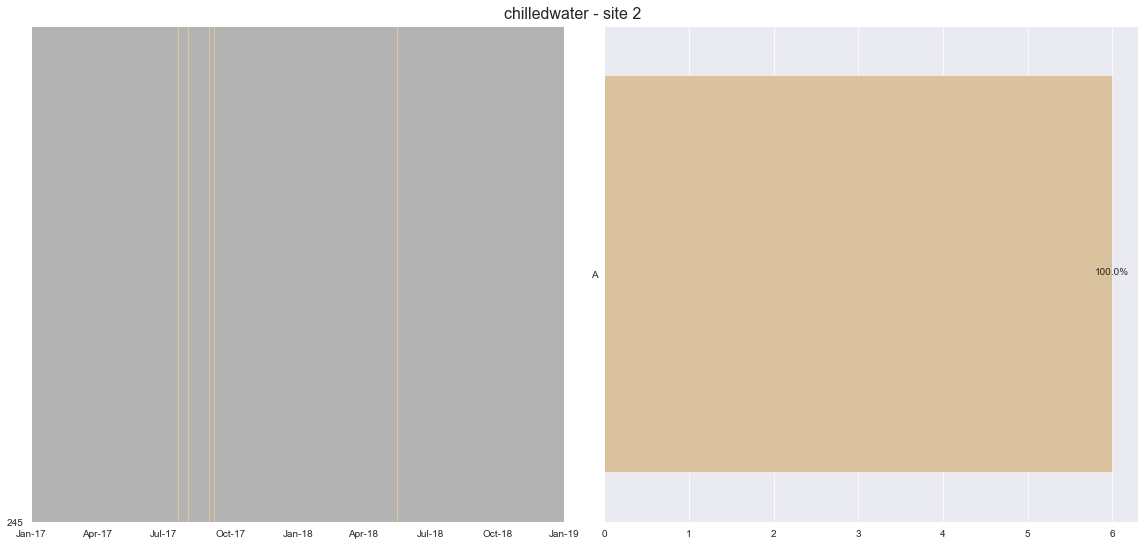

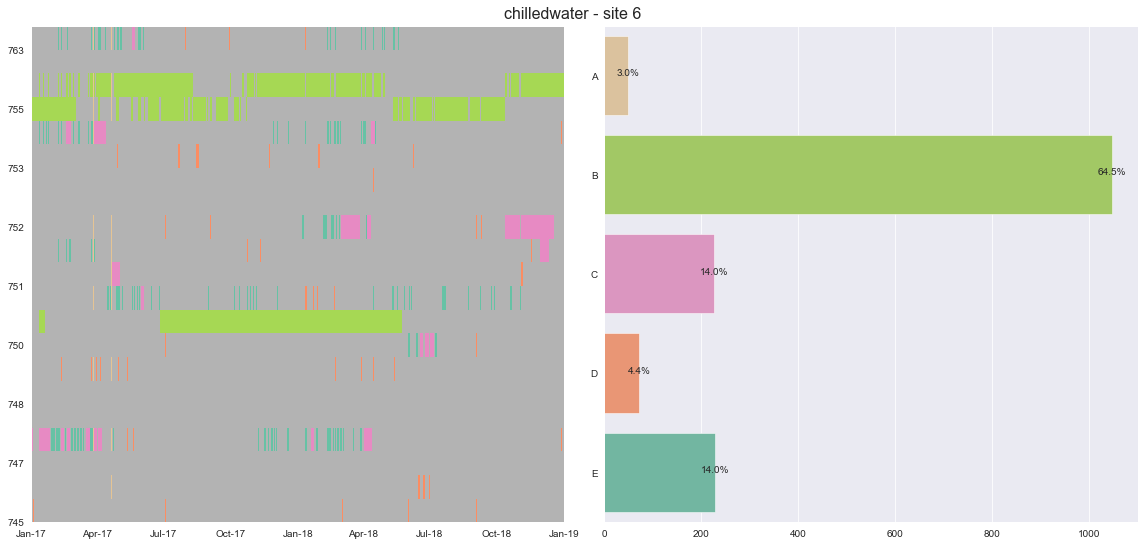

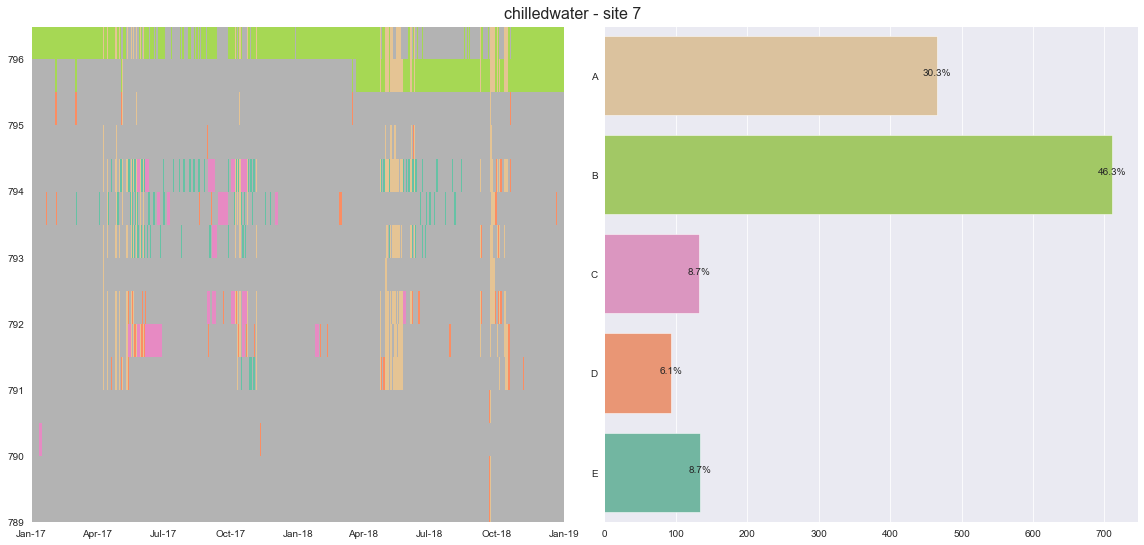

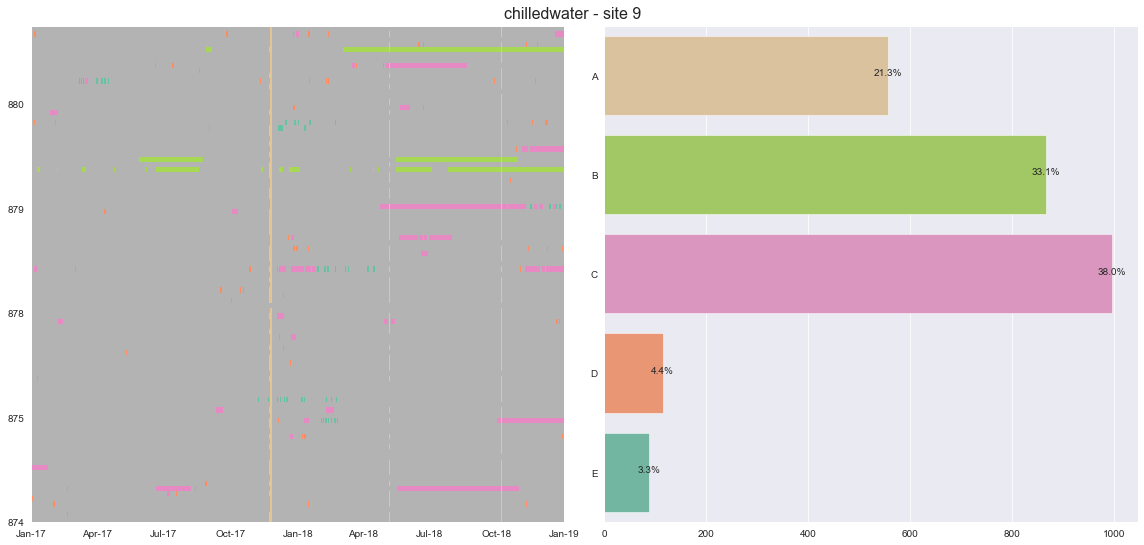

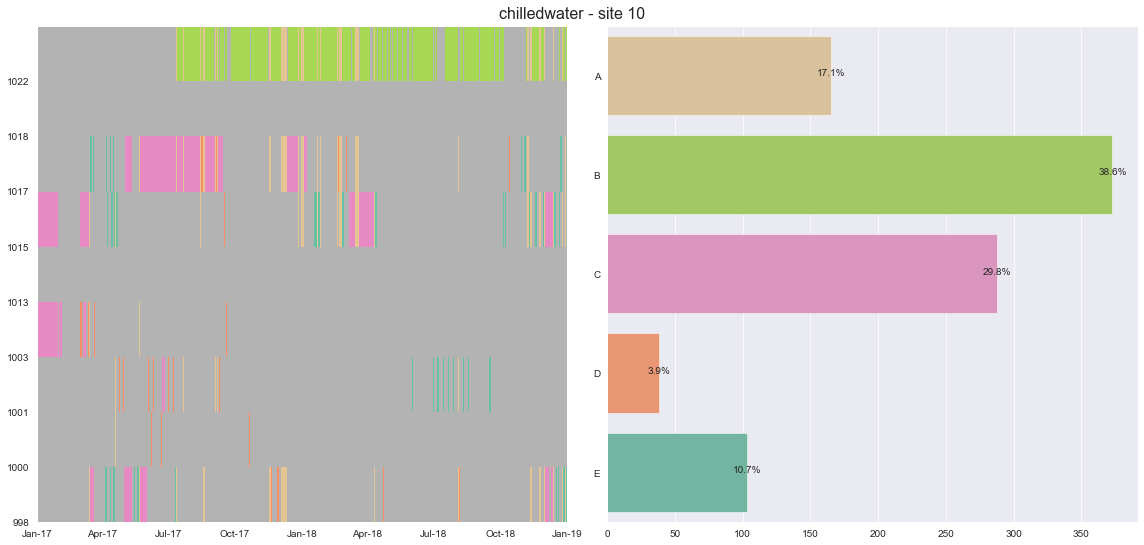

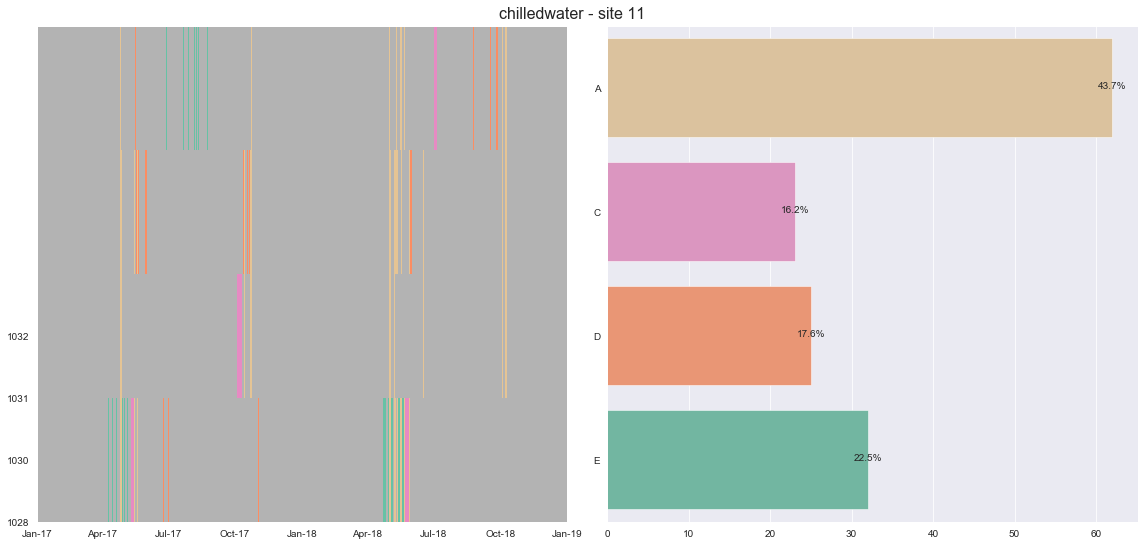

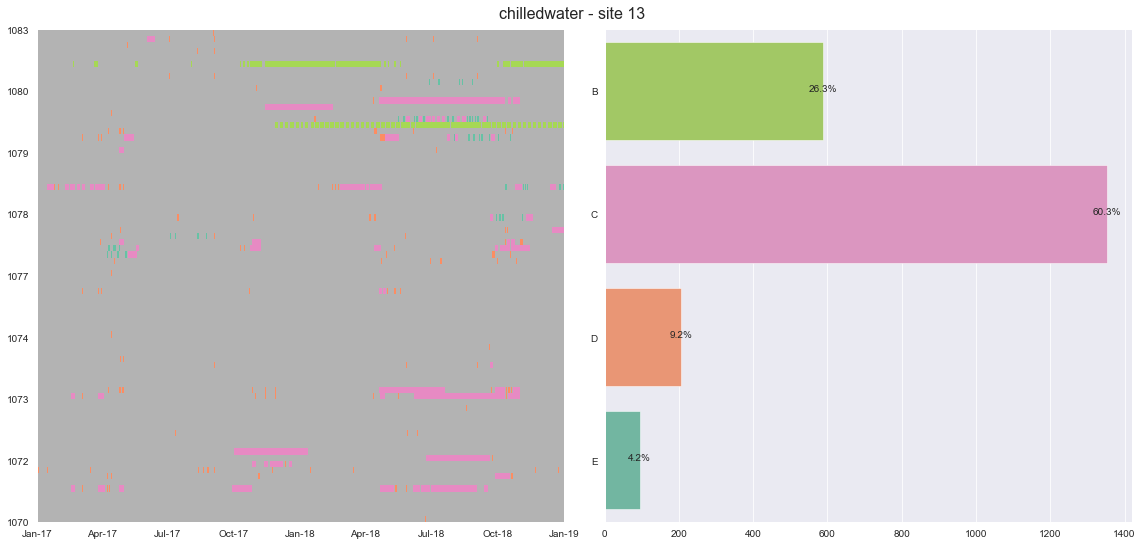

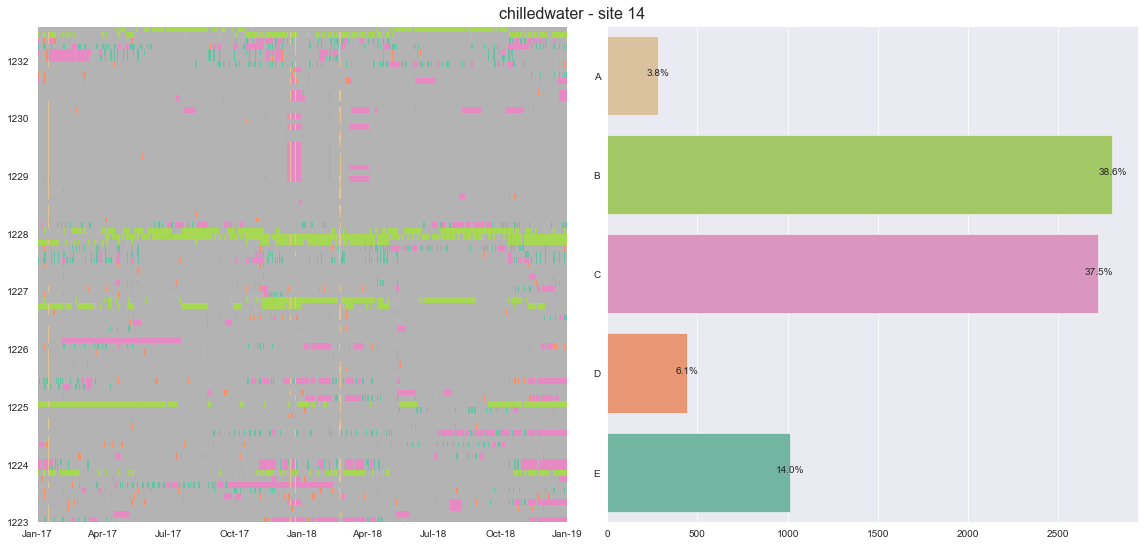

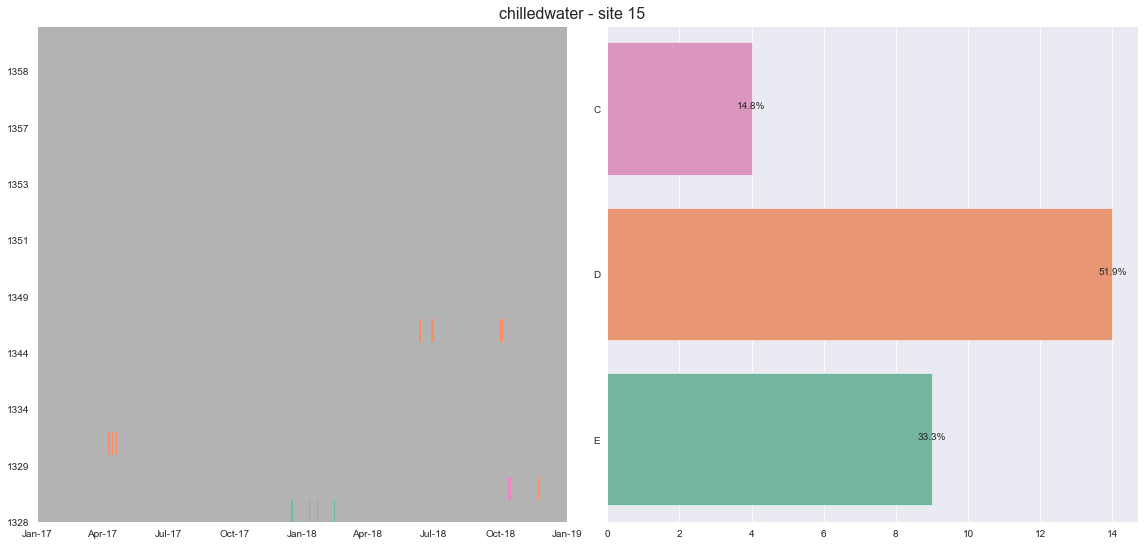

In [9]:
meter = "chilledwater"

# get sites
sites = get_sites(path_data,path_meta,meter)

for site in sites:
    # create errors df
    try:
        df_error, error_types = error_df(path_res, site)
    except:
        print(f"Site {site} not available.")
        continue

    # plot
    fig = plot_errors(df_error, error_types, ref)
    fig.savefig(path_fig + f"{meter}_site_{site}_errors.png", dpi=150, bbox_inches = "tight")

# Electricity meter

sites: 16. Buildings: 1413
Site 0 not available.
Site 1 error's dataframe created.
Error types found: [0.0, 1.0]
Site 2 not available.
Site 3 error's dataframe created.
Error types found: [0.0, 2.0, 3.0, 4.0, 5.0]
Site 4 not available.
Site 5 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 6 error's dataframe created.
Error types found: [0.0, 4.0]
Site 7 error's dataframe created.
Error types found: [0.0, 3.0, 4.0]
Site 8 error's dataframe created.
Error types found: [0.0, 2.0, 3.0, 4.0, 5.0]
Site 9 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 10 error's dataframe created.
Error types found: [0.0, 3.0, 4.0]
Site 11 not available.
Site 12 error's dataframe created.
Error types found: [0.0, 3.0, 4.0]
Site 13 error's dataframe created.
Error types found: [0.0, 3.0, 4.0]
Site 14 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 15 not available.


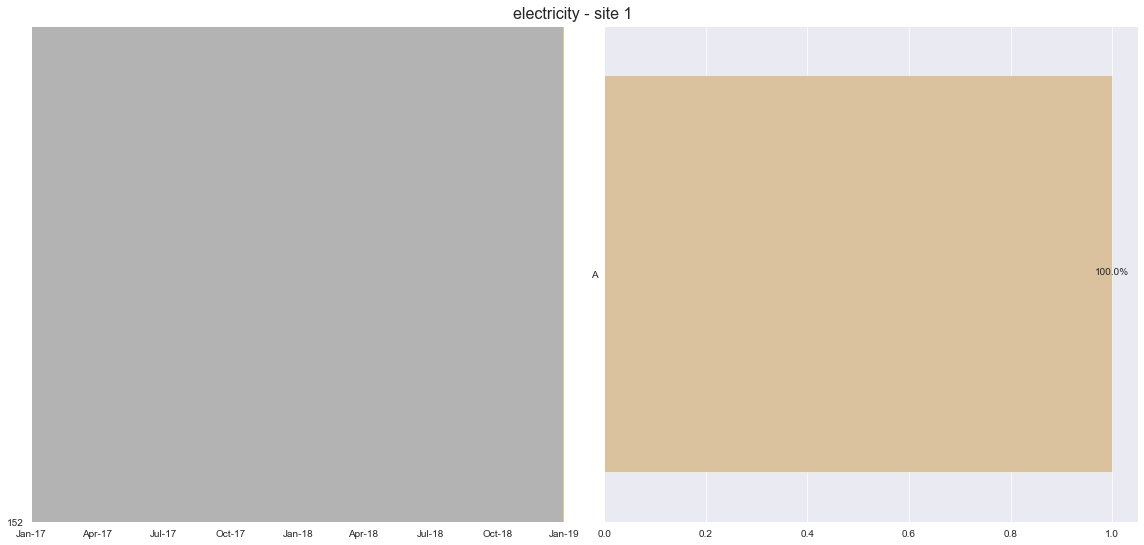

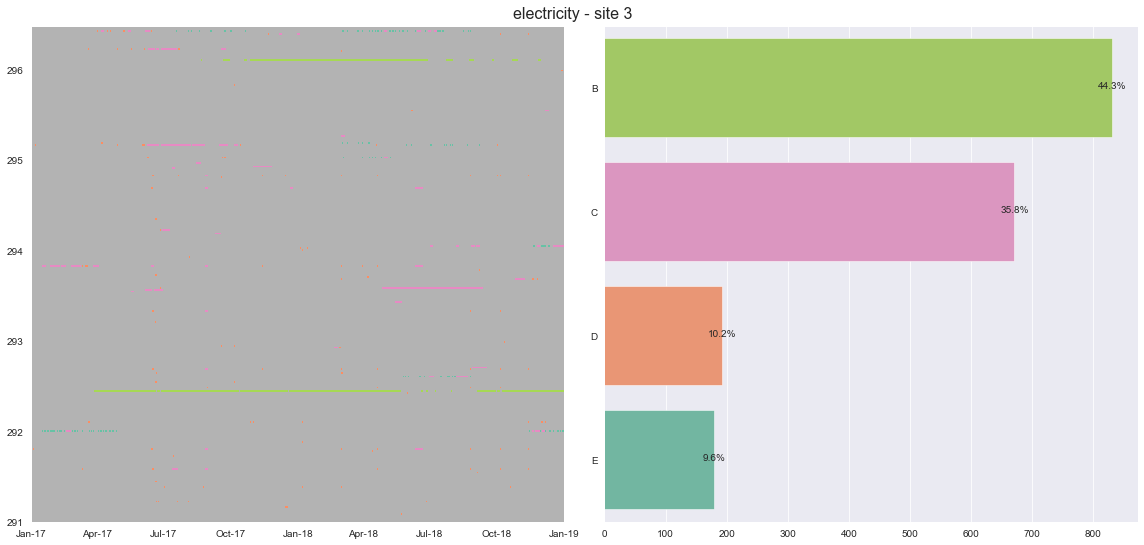

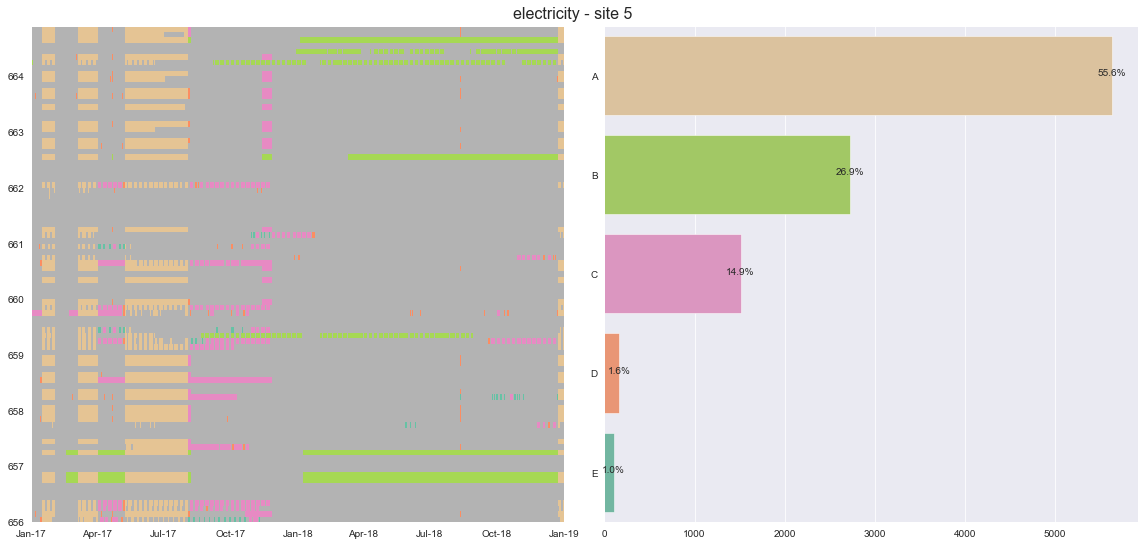

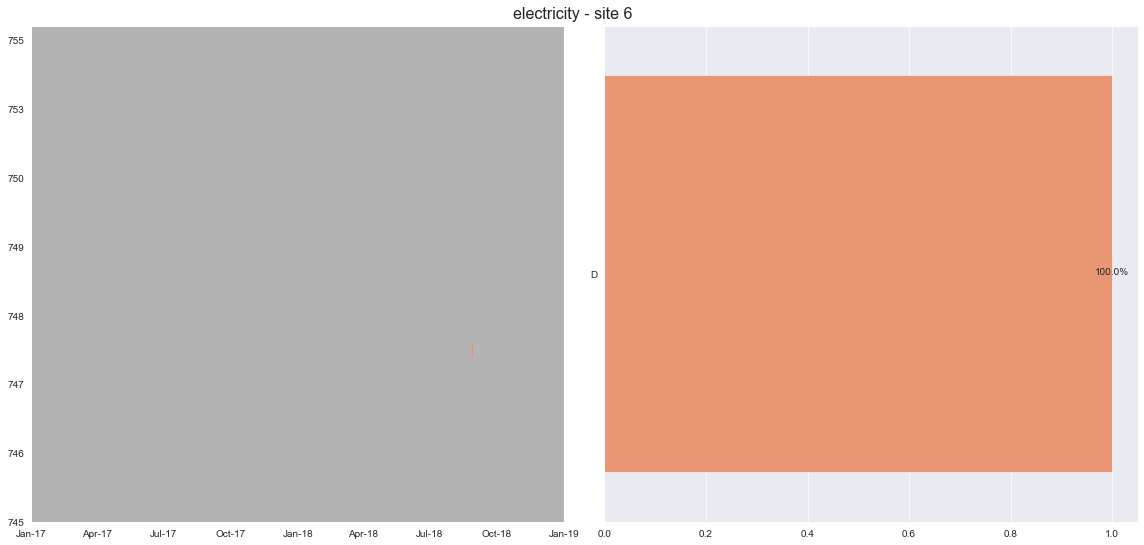

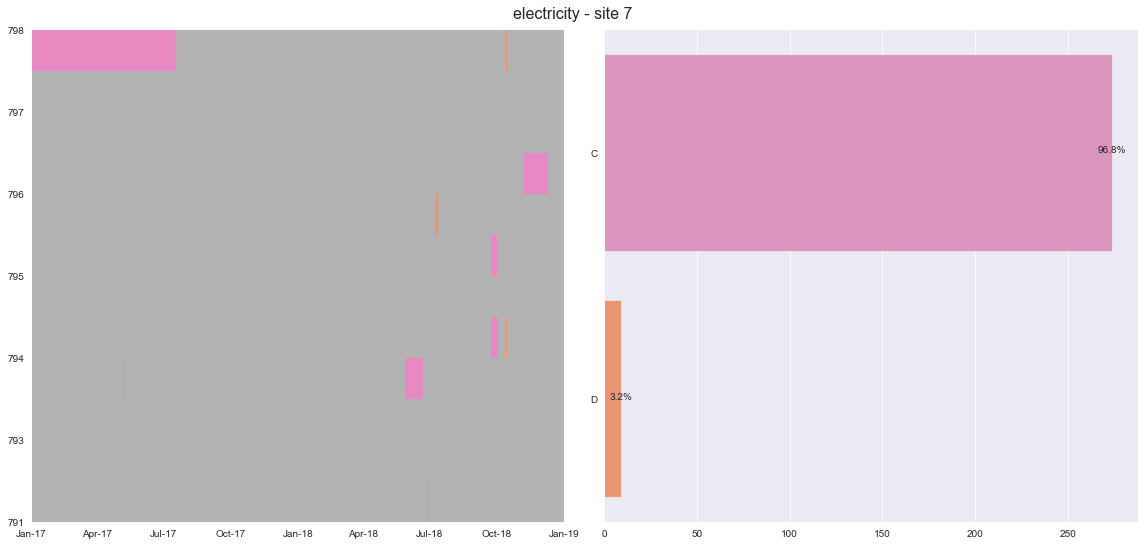

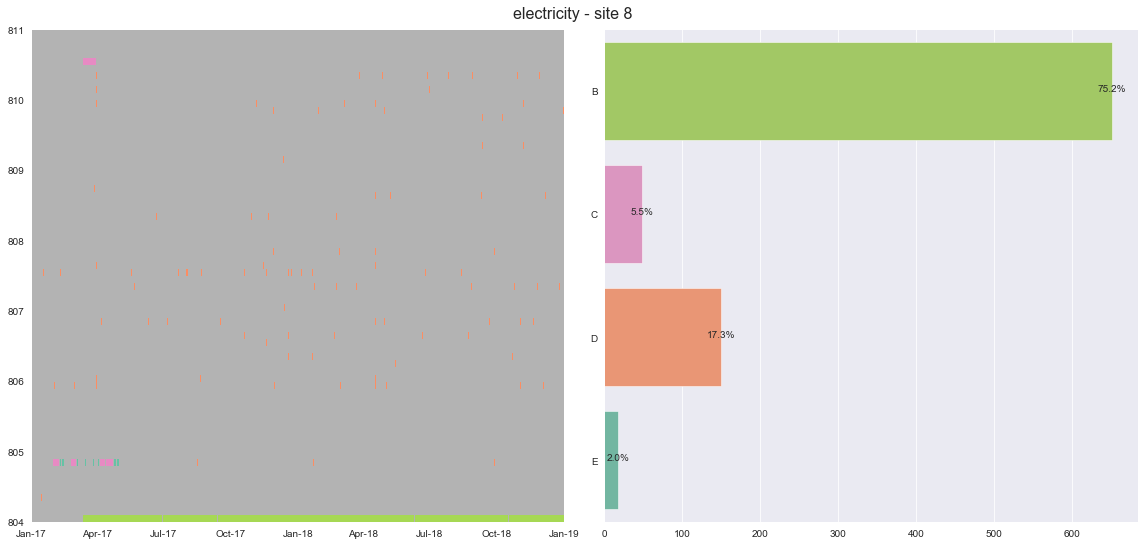

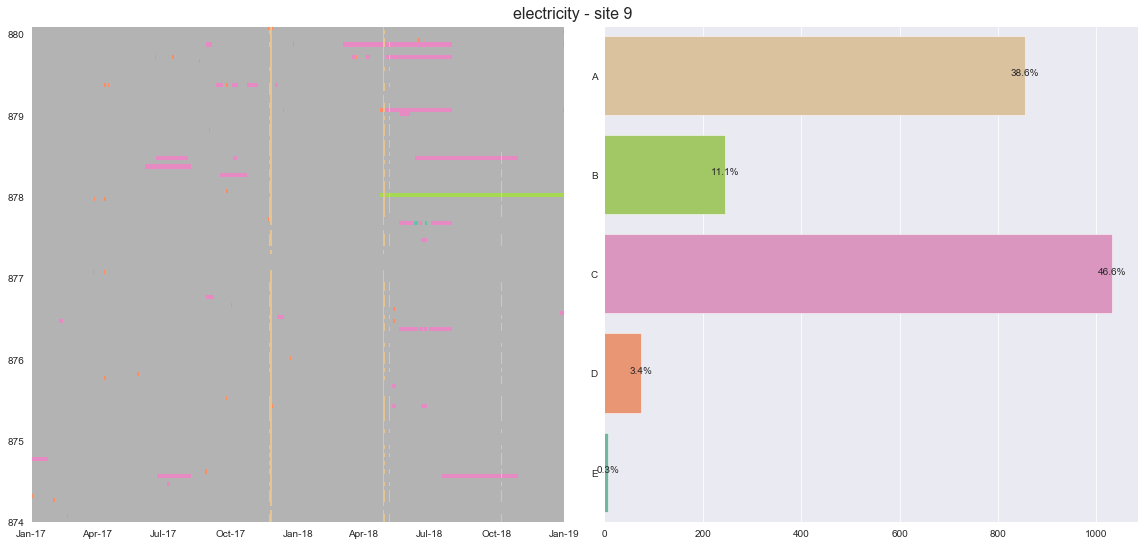

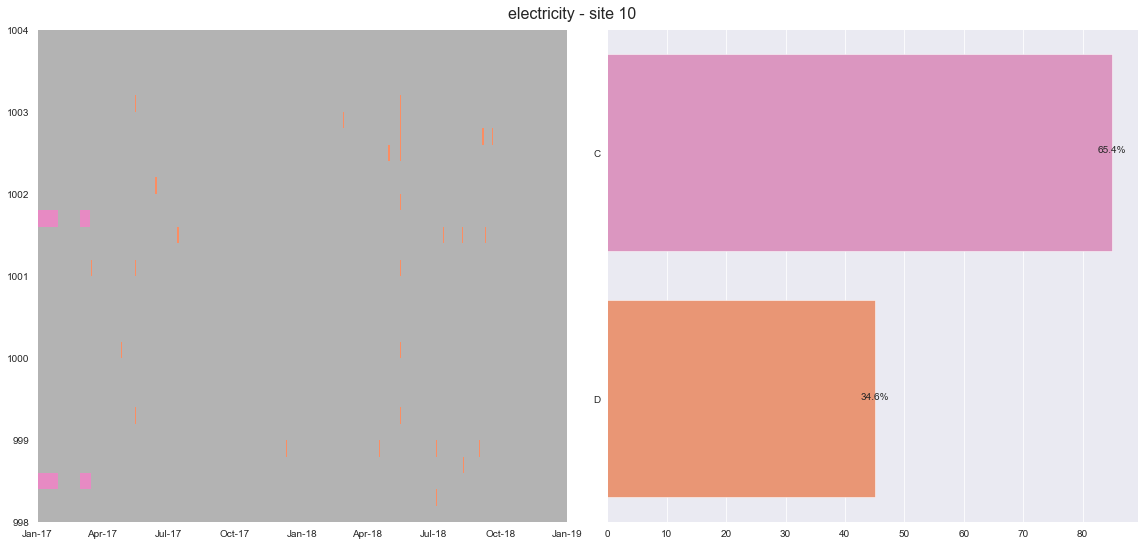

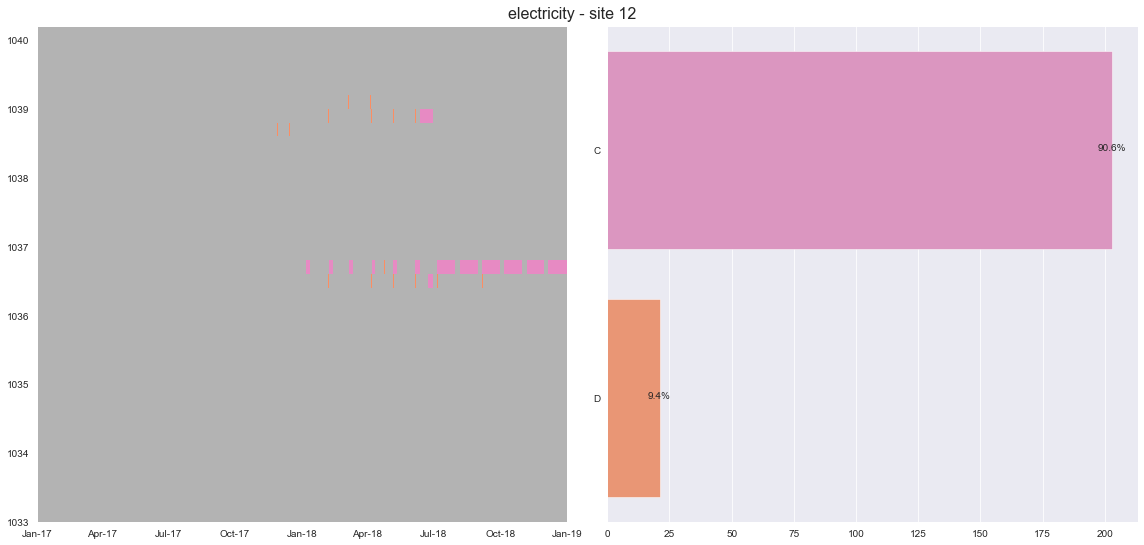

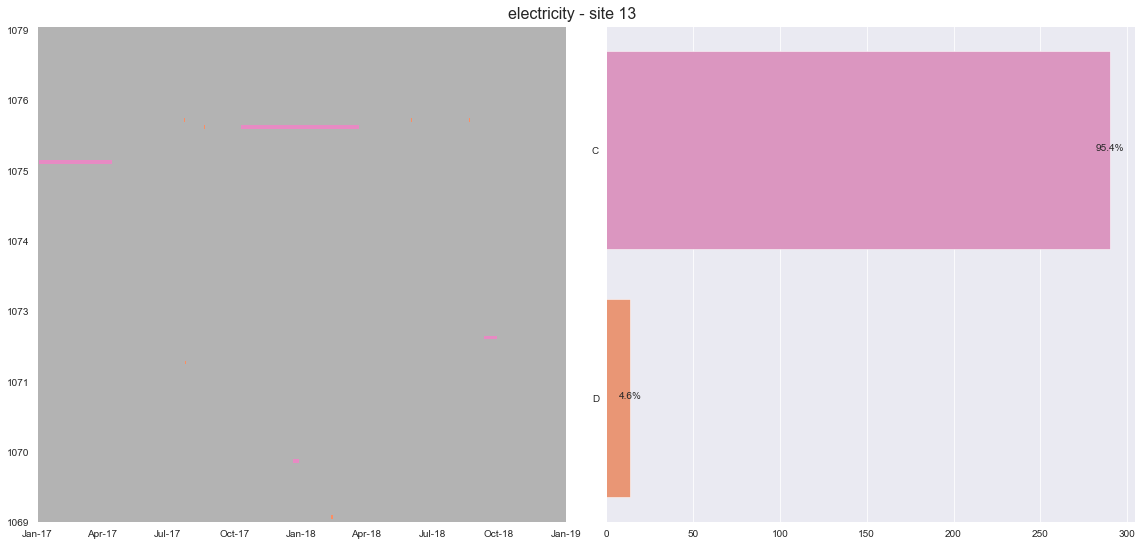

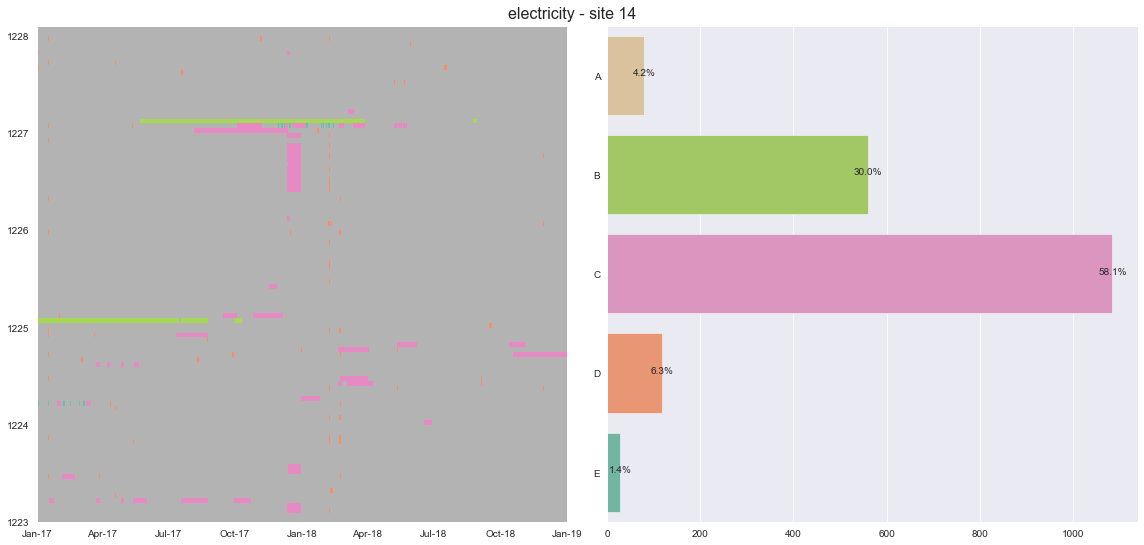

In [10]:
meter = "electricity"

# get sites
sites = get_sites(path_data,path_meta,meter)

for site in sites:
    # create errors df
    try:
        df_error, error_types = error_df(path_res, site)
    except:
        print(f"Site {site} not available.")
        continue

    # plot
    fig = plot_errors(df_error, error_types, ref)
    fig.savefig(path_fig + f"{meter}_site_{site}_errors.png", dpi=150, bbox_inches = "tight")

# Hotwater

sites: 7. Buildings: 145
Site 1 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 2 not available.
Site 7 error's dataframe created.
Error types found: [0.0, 1.0]
Site 10 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 11 error's dataframe created.
Error types found: [0.0, 1.0, 3.0, 4.0, 5.0]
Site 14 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 15 error's dataframe created.
Error types found: [0.0, 1.0]


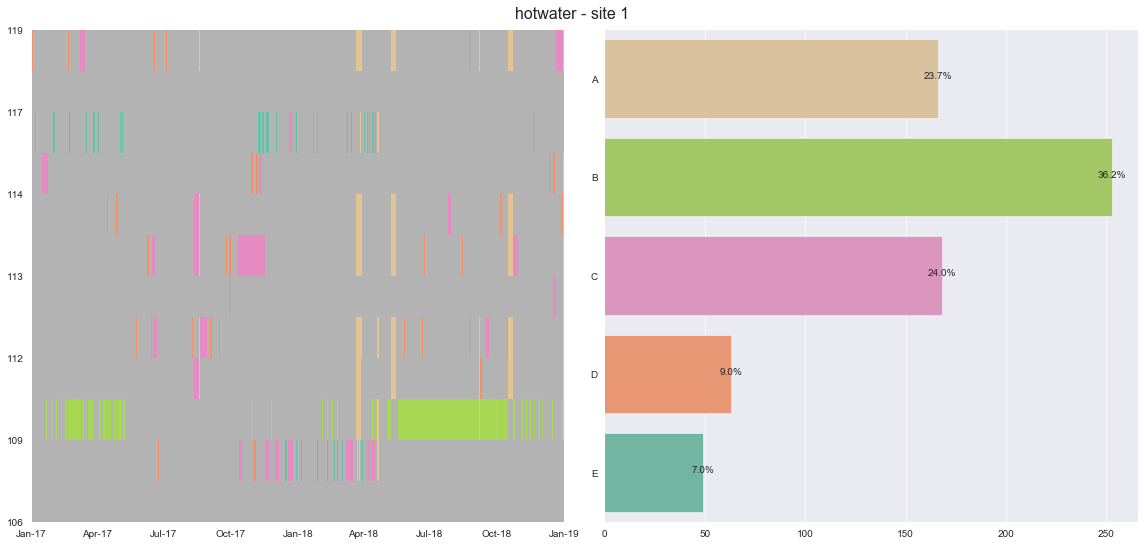

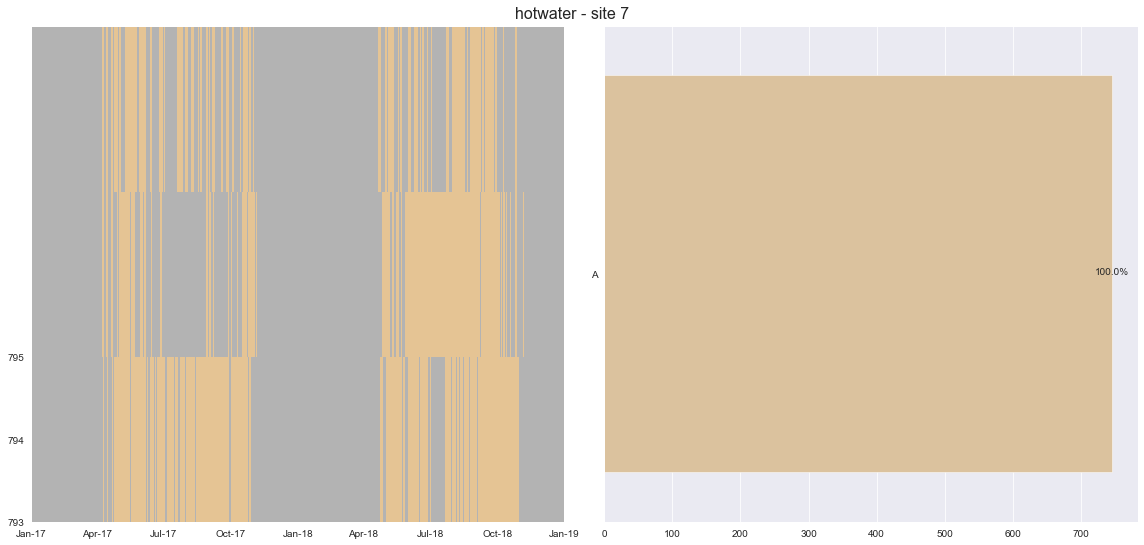

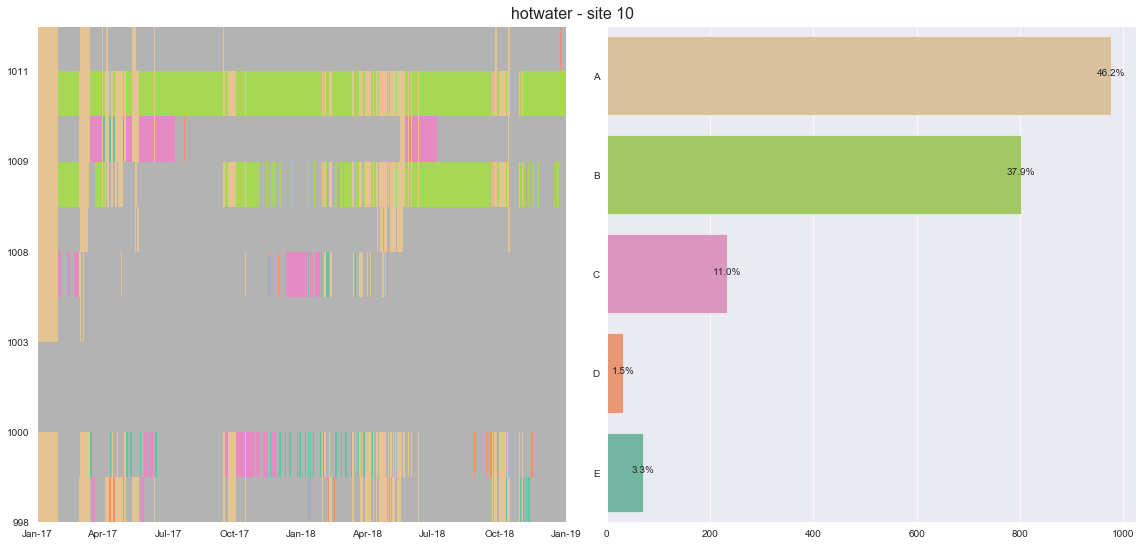

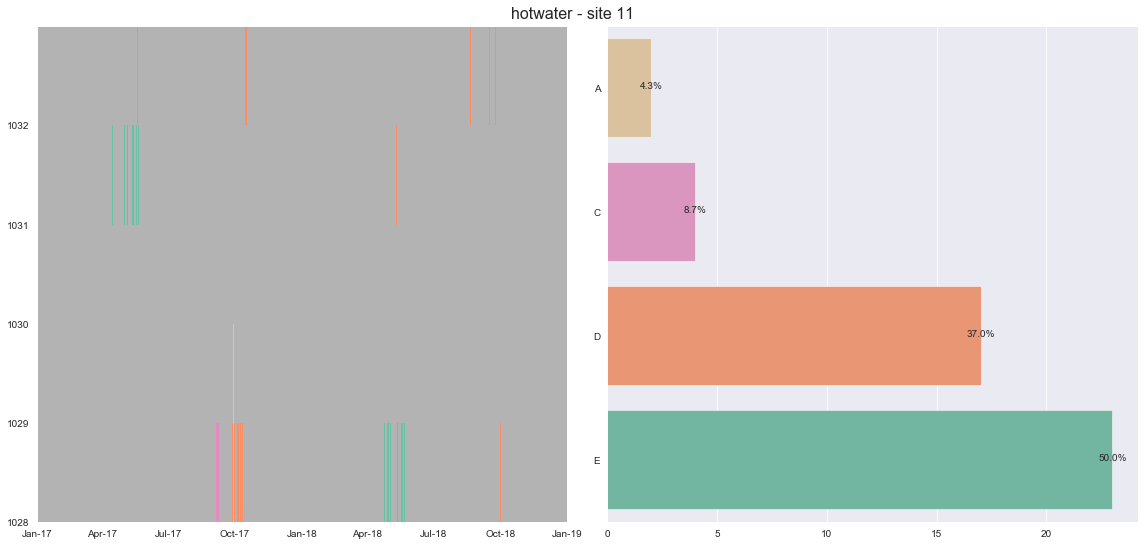

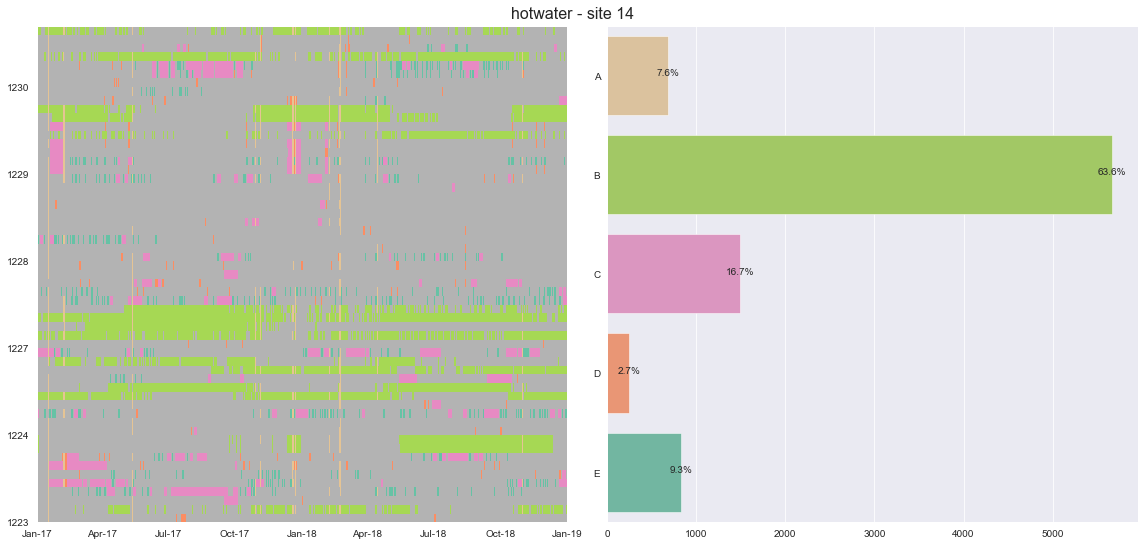

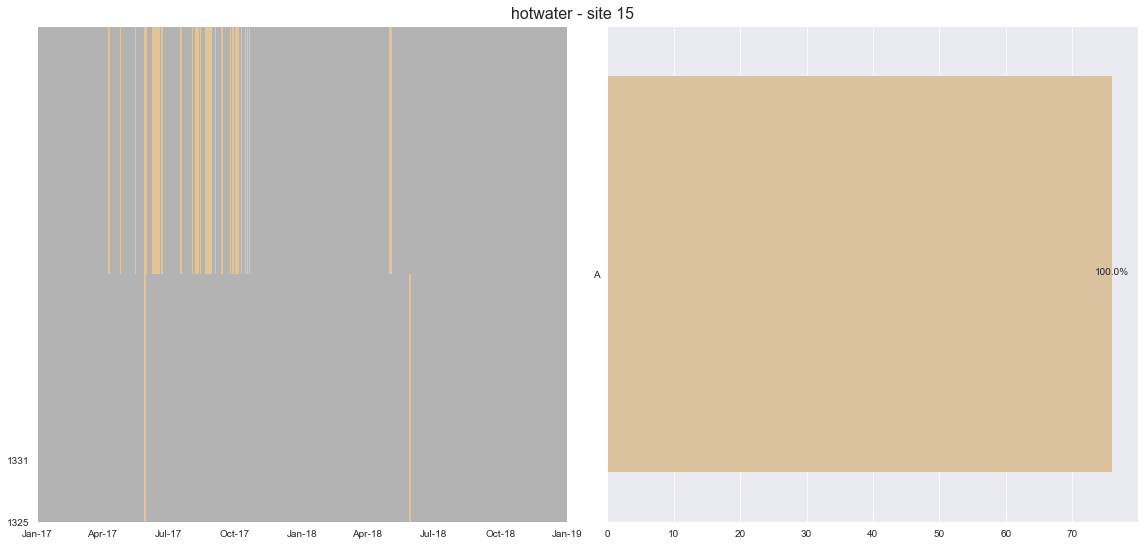

In [11]:
meter = "hotwater"

# get sites
sites = get_sites(path_data,path_meta,meter)

for site in sites:
    # create errors df
    try:
        df_error, error_types = error_df(path_res, site)
    except:
        print(f"Site {site} not available.")
        continue

    # plot
    fig = plot_errors(df_error, error_types, ref)
    fig.savefig(path_fig + f"{meter}_site_{site}_errors.png", dpi=150, bbox_inches = "tight")

# Steam meter

sites: 6. Buildings: 324
Site 6 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 7 error's dataframe created.
Error types found: [0.0, 1.0, 3.0, 4.0, 5.0]
Site 9 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 13 error's dataframe created.
Error types found: [0.0, 2.0, 3.0, 4.0, 5.0]
Site 14 error's dataframe created.
Error types found: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Site 15 error's dataframe created.
Error types found: [0.0, 1.0, 3.0, 4.0, 5.0]


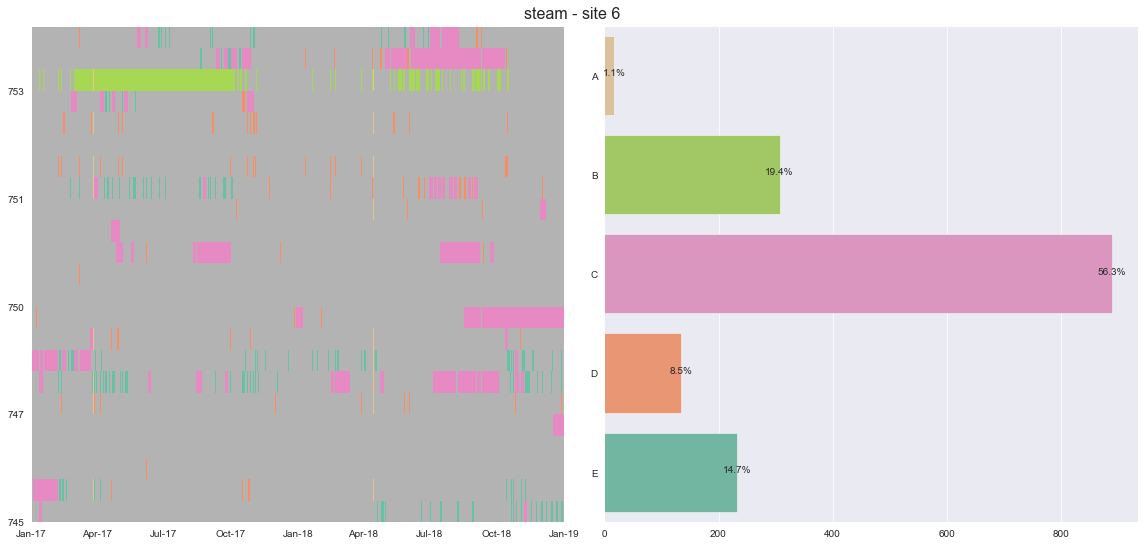

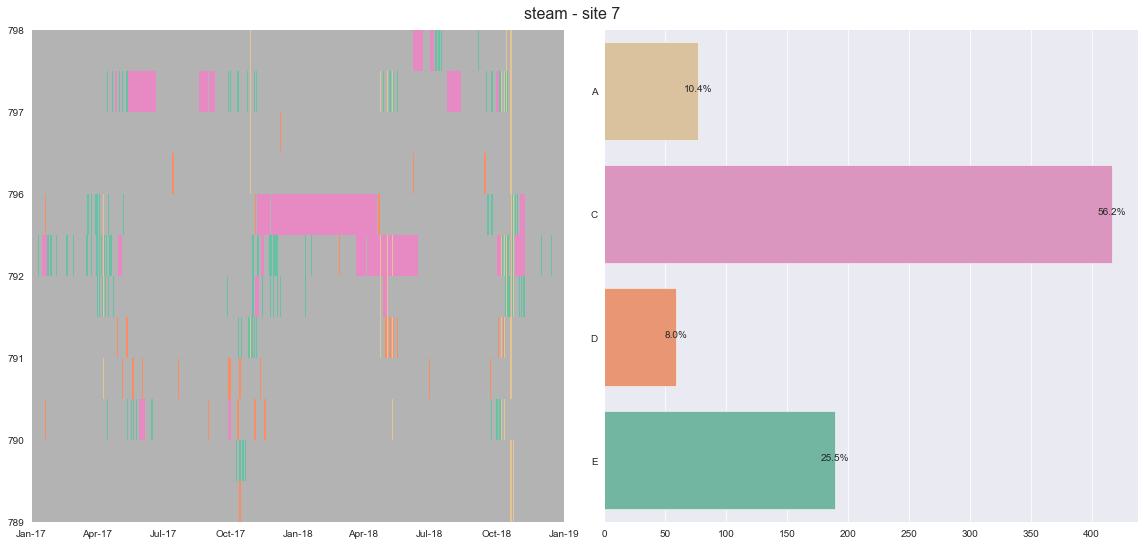

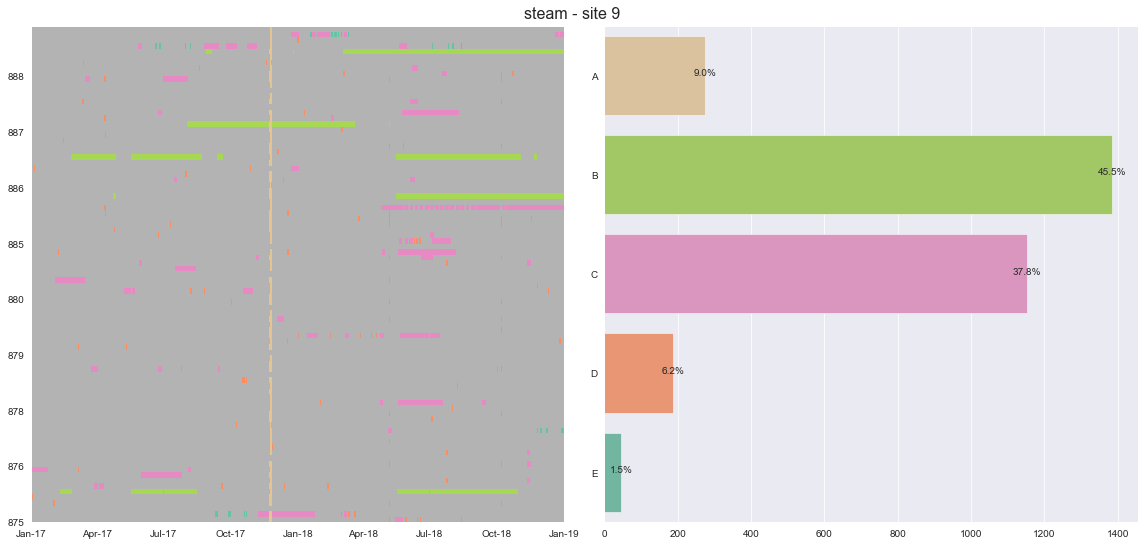

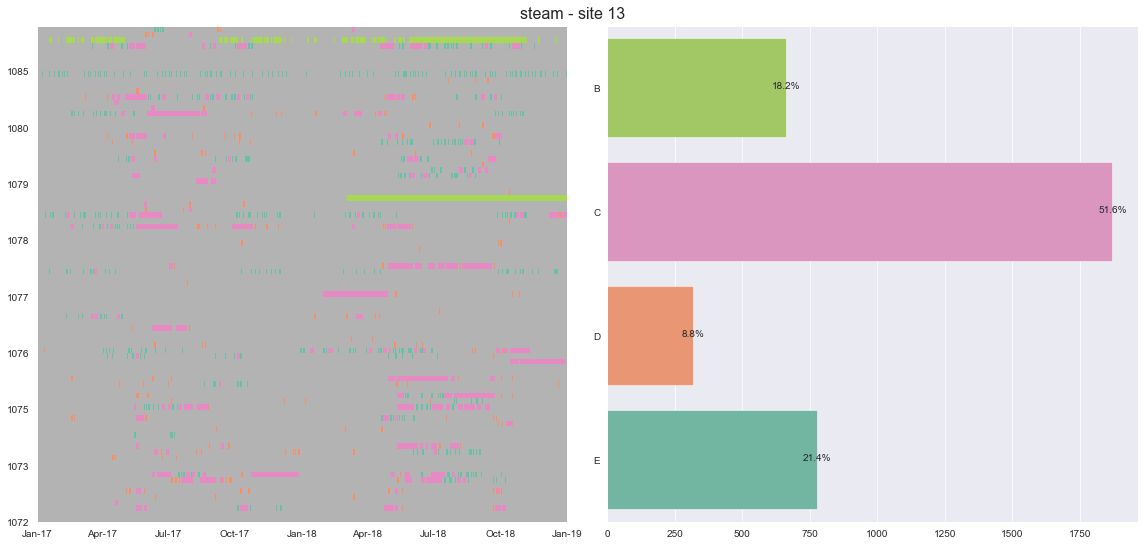

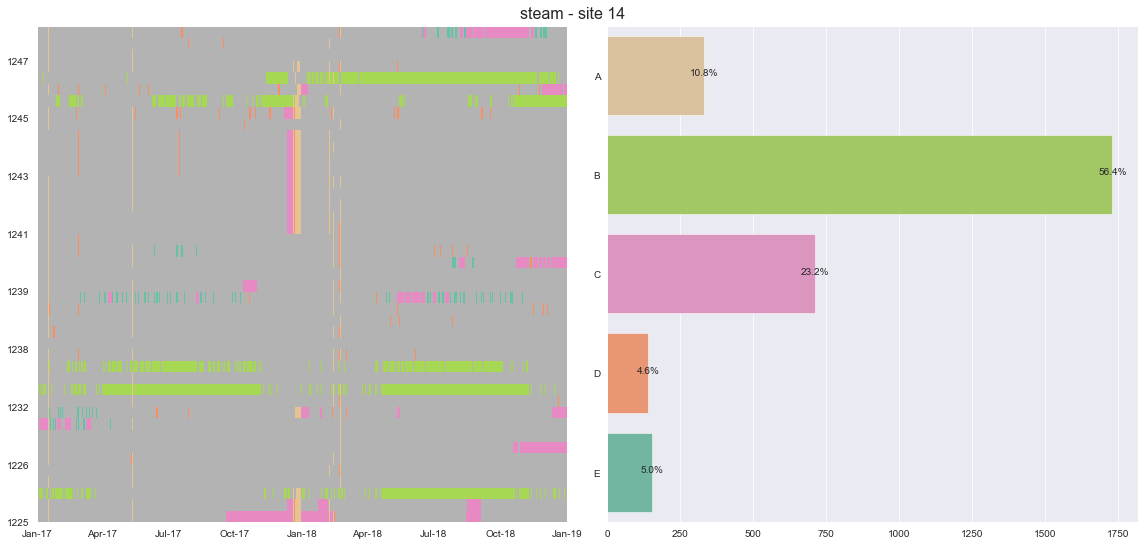

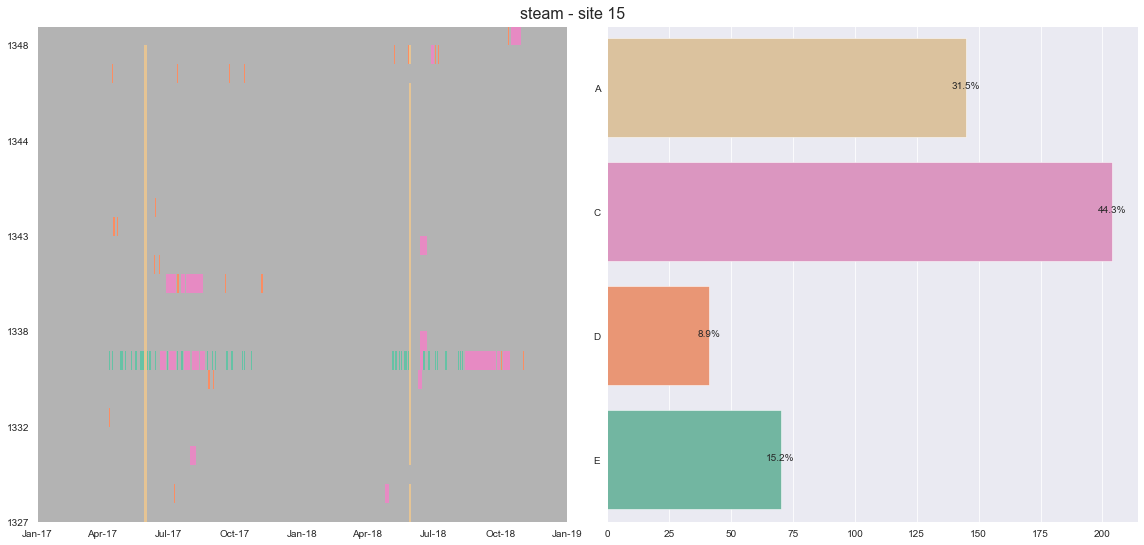

In [12]:
meter = "steam"

# get sites
sites = get_sites(path_data,path_meta,meter)

for site in sites:
    # create errors df
    try:
        df_error, error_types = error_df(path_res, site)
    except:
        print(f"Site {site} not available.")
        continue

    # plot
    fig = plot_errors(df_error, error_types, ref)
    fig.savefig(path_fig + f"{meter}_site_{site}_errors.png", dpi=150, bbox_inches = "tight")